# Mohr Coulomb Model Verification

## Description

In running Column Collapse problem, we observe some stress localizations and unsmooth stress distribution. However, the strain is smooth. This brings us to look into the soil model implementation, i.e. Mohr-Coulomb.

Displacement controlled element compression test is performed with 4 nodes as shown in the figure below.
<img src="element.jpg" alt="element" style="width: 300px;"/>

The details of the trial follows Samila Bandara's thesis (2013), shown in the next figure.

<img src="Samila1.png" alt="samila1" style="width: 720px;"/>

Her results are also shown below for completion.

<img src="Samila2.png" alt="samila2" style="width: 720px;"/>


## Benchmark

I personally try to implement my own Mohr-Coulomb model in MATLAB. However, there are still some bugs. Thus, in this comparison, I choose to use PLAXIS Soil Test. An example is shown below.

<img src="PLAXIS.png" alt="plaxis" style="width: 840px;"/>


## Results

Note that we run this in 2D, such that the defition is as follow:
- Axial Strain = $\varepsilon_y$ 
- Axial Stress = $\sigma_y$ 
- Volumetric Strain = $\varepsilon_v = \varepsilon_x + \varepsilon_y$ 


In [2]:
# Import Matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import Data

plaxis_psi0 = np.genfromtxt("PLAXIS_psi0.csv", delimiter=",")
plaxis_psi_neg5 = np.genfromtxt("PLAXIS_psi-5.csv", delimiter=",")
plaxis_psi_pos5 = np.genfromtxt("PLAXIS_psi+5.csv", delimiter=",")

nodamping_psi0 = np.genfromtxt("NoDamping_psi0.csv", delimiter=",")
nodamping_psi_neg5 = np.genfromtxt("NoDamping_psi-5.csv", delimiter=",")
nodamping_psi_pos5 = np.genfromtxt("NoDamping_psi+5.csv", delimiter=",")

damping_psi0 = np.genfromtxt("Damping_psi0.csv", delimiter=",")
damping_psi_neg5 = np.genfromtxt("Damping_psi-5.csv", delimiter=",")
damping_psi_pos5 = np.genfromtxt("Damping_psi+5.csv", delimiter=",")


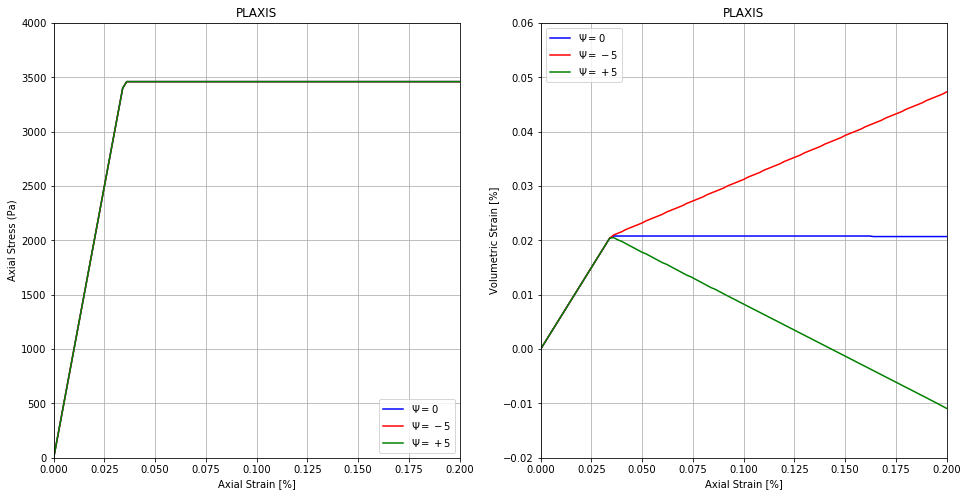

In [4]:
# Plot PLAXIS Results
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,1] * 1000, 'b', label='$\Psi = 0$')
plt.plot(plaxis_psi_neg5[:,0] * -100, plaxis_psi_neg5[:,1] * 1000, 'r', label='$\Psi = -5$')
plt.plot(plaxis_psi_pos5[:,0] * -100, plaxis_psi_pos5[:,1] * 1000, 'g', label='$\Psi = +5$')
plt.axis([0, 0.2, 0, 4000])
plt.legend(loc='lower right')
plt.title('PLAXIS')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(122)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,2] * -100, 'b', label='$\Psi = 0$')
plt.plot(plaxis_psi_neg5[:,0] * -100, plaxis_psi_neg5[:,2] * -100, 'r', label='$\Psi = -5$')
plt.plot(plaxis_psi_pos5[:,0] * -100, plaxis_psi_pos5[:,2] * -100, 'g', label='$\Psi = +5$')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('PLAXIS')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    
    
plt.show()

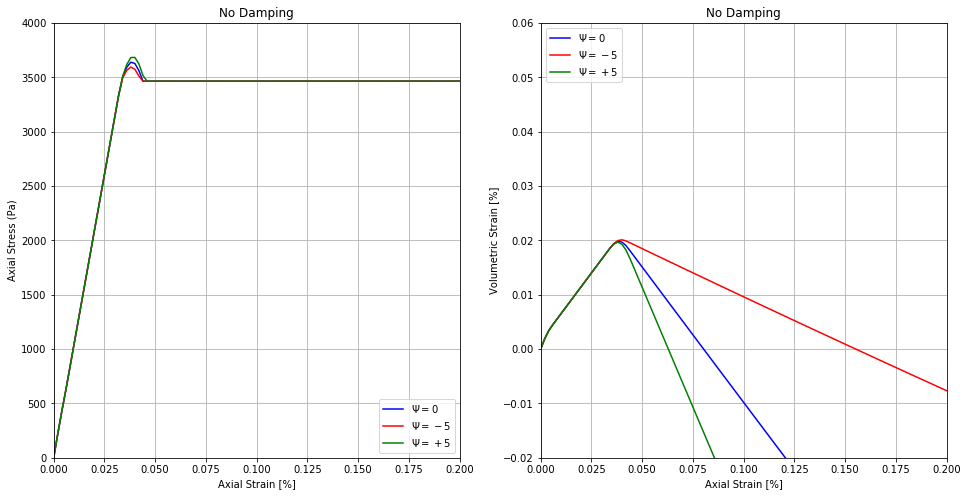

In [5]:
# Plot Results without Damping
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(nodamping_psi0[:,0], nodamping_psi0[:,1], 'b', label='$\Psi = 0$')
plt.plot(nodamping_psi_neg5[:,0], nodamping_psi_neg5[:,1], 'r', label='$\Psi = -5$')
plt.plot(nodamping_psi_pos5[:,0], nodamping_psi_pos5[:,1], 'g', label='$\Psi = +5$')
plt.axis([0, 0.2, 0, 4000])
plt.legend(loc='lower right')
plt.title('No Damping')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(122)
plt.plot(nodamping_psi0[:,0], nodamping_psi0[:,2], 'b', label='$\Psi = 0$')
plt.plot(nodamping_psi_neg5[:,0], nodamping_psi_neg5[:,2], 'r', label='$\Psi = -5$')
plt.plot(nodamping_psi_pos5[:,0], nodamping_psi_pos5[:,2], 'g', label='$\Psi = +5$')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('No Damping')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    
    
plt.show()

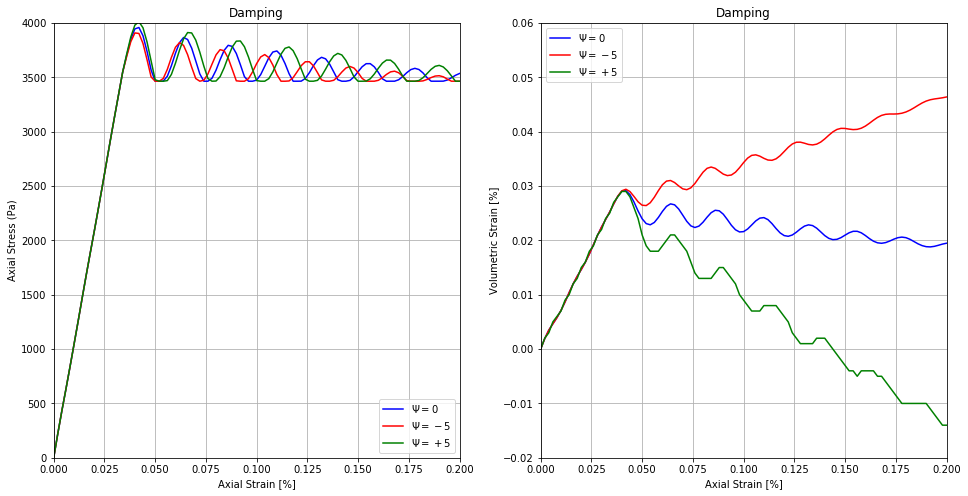

In [6]:
# Plot Results with Damping
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(damping_psi0[:,0], damping_psi0[:,1], 'b', label='$\Psi = 0$')
plt.plot(damping_psi_neg5[:,0], damping_psi_neg5[:,1], 'r', label='$\Psi = -5$')
plt.plot(damping_psi_pos5[:,0], damping_psi_pos5[:,1], 'g', label='$\Psi = +5$')
plt.axis([0, 0.2, 0, 4000])
plt.legend(loc='lower right')
plt.title('Damping')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(122)
plt.plot(damping_psi0[:,0], damping_psi0[:,2], 'b', label='$\Psi = 0$')
plt.plot(damping_psi_neg5[:,0], damping_psi_neg5[:,2], 'r', label='$\Psi = -5$')
plt.plot(damping_psi_pos5[:,0], damping_psi_pos5[:,2], 'g', label='$\Psi = +5$')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('Damping')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    
    
plt.show()

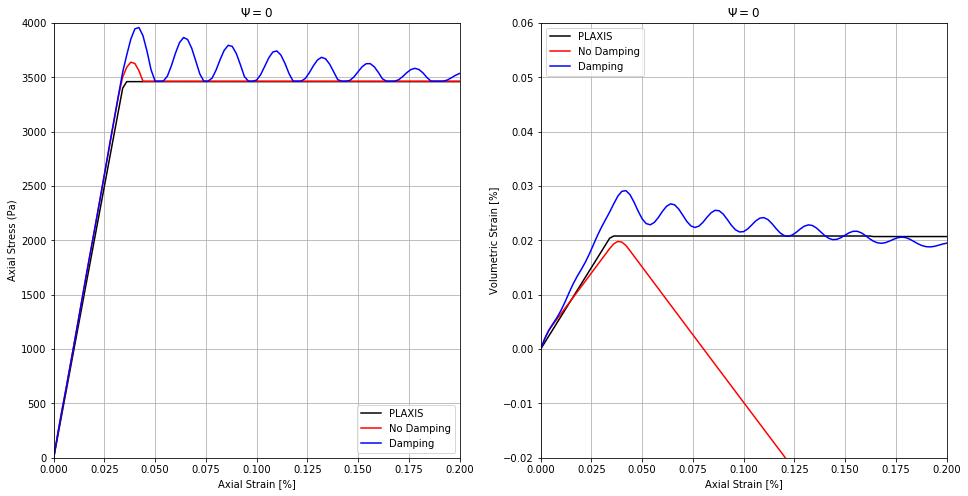

In [7]:
# Plot Comparison for Psi = 0
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,1] * 1000, 'k', label='PLAXIS')
plt.plot(nodamping_psi0[:,0], nodamping_psi0[:,1], 'r', label='No Damping')
plt.plot(damping_psi0[:,0], damping_psi0[:,1], 'b', label='Damping')
plt.axis([0, 0.2, 0, 4000])
plt.legend(loc='lower right')
plt.title('$\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(122)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,2] * -100, 'k', label='PLAXIS')
plt.plot(nodamping_psi0[:,0], nodamping_psi0[:,2], 'r', label='No Damping')
plt.plot(damping_psi0[:,0], damping_psi0[:,2], 'b', label='Damping')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('$\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    
    
plt.show()

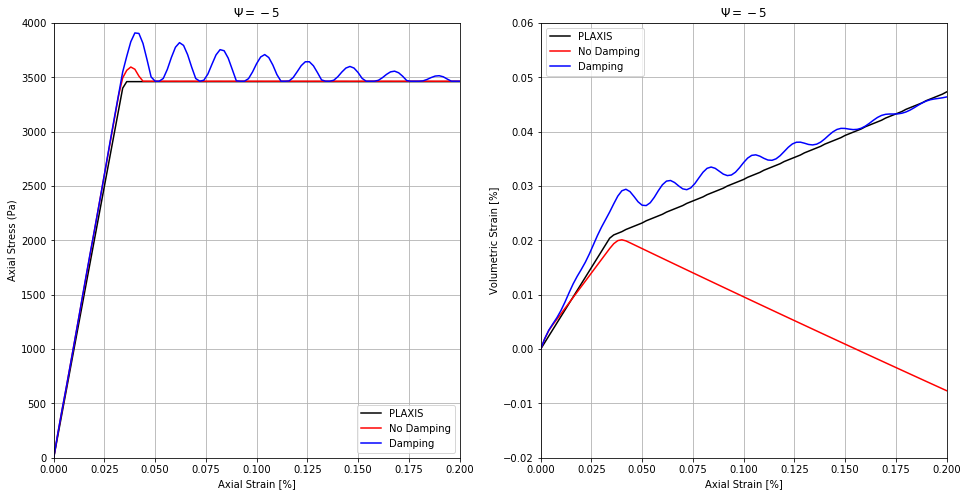

In [8]:
# Plot Comparison for Psi = -5
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(plaxis_psi_neg5[:,0] * -100, plaxis_psi_neg5[:,1] * 1000, 'k', label='PLAXIS')
plt.plot(nodamping_psi_neg5[:,0], nodamping_psi_neg5[:,1], 'r', label='No Damping')
plt.plot(damping_psi_neg5[:,0], damping_psi_neg5[:,1], 'b', label='Damping')
plt.axis([0, 0.2, 0, 4000])
plt.legend(loc='lower right')
plt.title('$\Psi = -5$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(122)
plt.plot(plaxis_psi_neg5[:,0] * -100, plaxis_psi_neg5[:,2] * -100, 'k', label='PLAXIS')
plt.plot(nodamping_psi_neg5[:,0], nodamping_psi_neg5[:,2], 'r', label='No Damping')
plt.plot(damping_psi_neg5[:,0], damping_psi_neg5[:,2], 'b', label='Damping')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('$\Psi = -5$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    
    
plt.show()

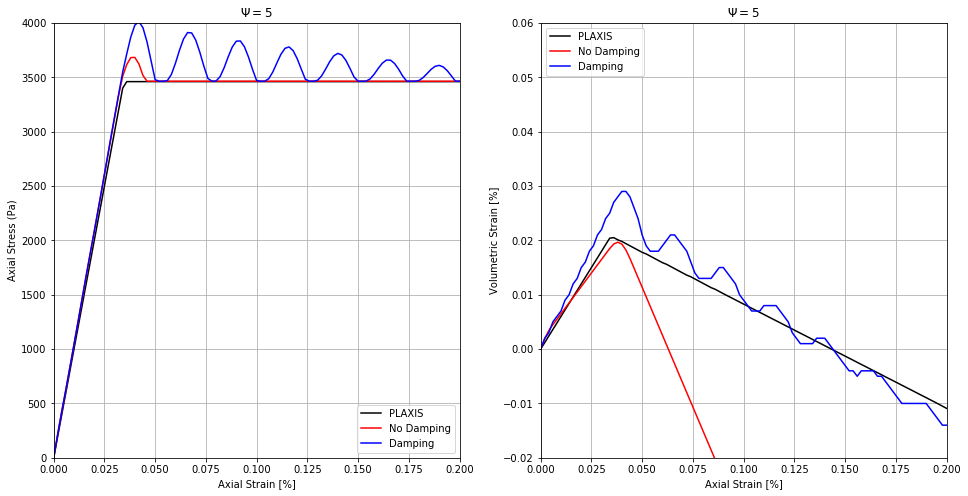

In [9]:
# Plot Comparison for Psi = 5
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(plaxis_psi_pos5[:,0] * -100, plaxis_psi_pos5[:,1] * 1000, 'k', label='PLAXIS')
plt.plot(nodamping_psi_pos5[:,0], nodamping_psi_pos5[:,1], 'r', label='No Damping')
plt.plot(damping_psi_pos5[:,0], damping_psi_pos5[:,1], 'b', label='Damping')
plt.axis([0, 0.2, 0, 4000])
plt.legend(loc='lower right')
plt.title('$\Psi = 5$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(122)
plt.plot(plaxis_psi_pos5[:,0] * -100, plaxis_psi_pos5[:,2] * -100, 'k', label='PLAXIS')
plt.plot(nodamping_psi_pos5[:,0], nodamping_psi_pos5[:,2], 'r', label='No Damping')
plt.plot(damping_psi_pos5[:,0], damping_psi_pos5[:,2], 'b', label='Damping')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('$\Psi = 5$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    
    
plt.show()

## Observation and Analysis

On comparison
- The results with damping oscillate, while the results without damping do not
- But damping shows behavior closer to the benchmark
- Oscillation might arrise from it being an element test

So, no conclusion about the implementation of Mohr-Coulomb

As a suggestion, we might want to implement a way to set velocity displacement for future use

## Plotting all 4 points in Element

- Point 0: botom left
- Point 1: bottom right
- Point 2: upper left
- Point 3: upper right

In [23]:
# Getting more data

stress_damping_psi0_0 = np.genfromtxt("1/Stress_0.txt")
stress_damping_psi0_1 = np.genfromtxt("1/Stress_1.txt")
stress_damping_psi0_2 = np.genfromtxt("1/Stress_2.txt")
stress_damping_psi0_3 = np.genfromtxt("1/Stress_3.txt")
strain_damping_psi0_0 = np.genfromtxt("1/Strain_0.txt")
strain_damping_psi0_1 = np.genfromtxt("1/Strain_1.txt")
strain_damping_psi0_2 = np.genfromtxt("1/Strain_2.txt")
strain_damping_psi0_3 = np.genfromtxt("1/Strain_3.txt")

stress_damping_psi_neg5_0 = np.genfromtxt("2/Stress_0.txt")
stress_damping_psi_neg5_1 = np.genfromtxt("2/Stress_1.txt")
stress_damping_psi_neg5_2 = np.genfromtxt("2/Stress_2.txt")
stress_damping_psi_neg5_3 = np.genfromtxt("2/Stress_3.txt")
strain_damping_psi_neg5_0 = np.genfromtxt("2/Strain_0.txt")
strain_damping_psi_neg5_1 = np.genfromtxt("2/Strain_1.txt")
strain_damping_psi_neg5_2 = np.genfromtxt("2/Strain_2.txt")
strain_damping_psi_neg5_3 = np.genfromtxt("2/Strain_3.txt")

stress_damping_psi_pos5_0 = np.genfromtxt("3/Stress_0.txt")
stress_damping_psi_pos5_1 = np.genfromtxt("3/Stress_1.txt")
stress_damping_psi_pos5_2 = np.genfromtxt("3/Stress_2.txt")
stress_damping_psi_pos5_3 = np.genfromtxt("3/Stress_3.txt")
strain_damping_psi_pos5_0 = np.genfromtxt("3/Strain_0.txt")
strain_damping_psi_pos5_1 = np.genfromtxt("3/Strain_1.txt")
strain_damping_psi_pos5_2 = np.genfromtxt("3/Strain_2.txt")
strain_damping_psi_pos5_3 = np.genfromtxt("3/Strain_3.txt")

stress_nodamping_psi0_0 = np.genfromtxt("4/Stress_0.txt")
stress_nodamping_psi0_1 = np.genfromtxt("4/Stress_1.txt")
stress_nodamping_psi0_2 = np.genfromtxt("4/Stress_2.txt")
stress_nodamping_psi0_3 = np.genfromtxt("4/Stress_3.txt")
strain_nodamping_psi0_0 = np.genfromtxt("4/Strain_0.txt")
strain_nodamping_psi0_1 = np.genfromtxt("4/Strain_1.txt")
strain_nodamping_psi0_2 = np.genfromtxt("4/Strain_2.txt")
strain_nodamping_psi0_3 = np.genfromtxt("4/Strain_3.txt")

stress_nodamping_psi_neg5_0 = np.genfromtxt("5/Stress_0.txt")
stress_nodamping_psi_neg5_1 = np.genfromtxt("5/Stress_1.txt")
stress_nodamping_psi_neg5_2 = np.genfromtxt("5/Stress_2.txt")
stress_nodamping_psi_neg5_3 = np.genfromtxt("5/Stress_3.txt")
strain_nodamping_psi_neg5_0 = np.genfromtxt("5/Strain_0.txt")
strain_nodamping_psi_neg5_1 = np.genfromtxt("5/Strain_1.txt")
strain_nodamping_psi_neg5_2 = np.genfromtxt("5/Strain_2.txt")
strain_nodamping_psi_neg5_3 = np.genfromtxt("5/Strain_3.txt")

stress_nodamping_psi_pos5_0 = np.genfromtxt("6/Stress_0.txt")
stress_nodamping_psi_pos5_1 = np.genfromtxt("6/Stress_1.txt")
stress_nodamping_psi_pos5_2 = np.genfromtxt("6/Stress_2.txt")
stress_nodamping_psi_pos5_3 = np.genfromtxt("6/Stress_3.txt")
strain_nodamping_psi_pos5_0 = np.genfromtxt("6/Strain_0.txt")
strain_nodamping_psi_pos5_1 = np.genfromtxt("6/Strain_1.txt")
strain_nodamping_psi_pos5_2 = np.genfromtxt("6/Strain_2.txt")
strain_nodamping_psi_pos5_3 = np.genfromtxt("6/Strain_3.txt")


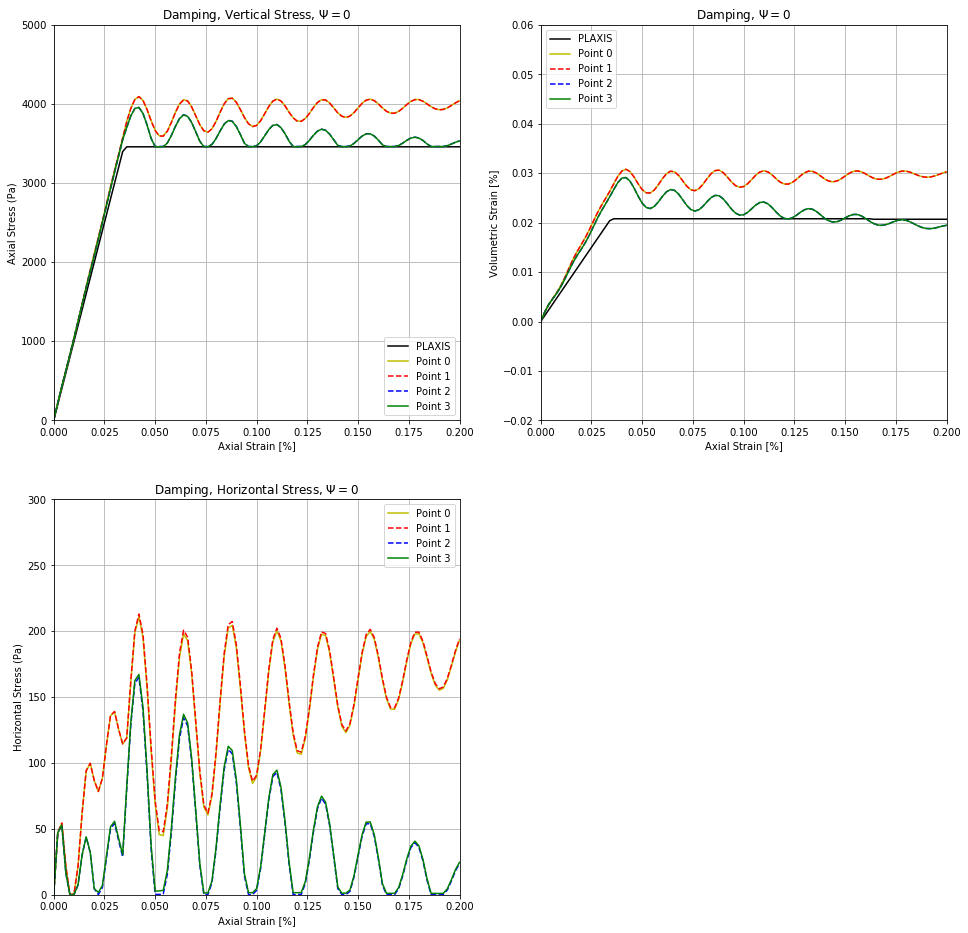

In [34]:
# Plot Comparison for Psi = 0, No Damping
plt.figure(figsize=(16,16))

plt.subplot(221)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,1] * 1000, 'k', label='PLAXIS')
plt.plot(strain_damping_psi0_0[:,2] * -100 , stress_damping_psi0_0[:,2] * -1, 'y', label='Point 0')
plt.plot(strain_damping_psi0_1[:,2] * -100 , stress_damping_psi0_1[:,2] * -1, 'r--', label='Point 1')
plt.plot(strain_damping_psi0_2[:,2] * -100 , stress_damping_psi0_2[:,2] * -1, 'b--', label='Point 2')
plt.plot(strain_damping_psi0_3[:,2] * -100 , stress_damping_psi0_3[:,2] * -1, 'g', label='Point 3')
plt.axis([0, 0.2, 0, 5000])
plt.legend(loc='lower right')
plt.title('Damping, Vertical Stress, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(222)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,2] * -100, 'k', label='PLAXIS')
plt.plot(strain_damping_psi0_0[:,2] * -100 , (strain_damping_psi0_0[:,2] + strain_damping_psi0_0[:,1]) * -100, 'y', label='Point 0')
plt.plot(strain_damping_psi0_1[:,2] * -100 , (strain_damping_psi0_1[:,2] + strain_damping_psi0_1[:,1]) * -100, 'r--', label='Point 1')
plt.plot(strain_damping_psi0_2[:,2] * -100 , (strain_damping_psi0_2[:,2] + strain_damping_psi0_2[:,1]) * -100, 'b--', label='Point 2')
plt.plot(strain_damping_psi0_3[:,2] * -100 , (strain_damping_psi0_3[:,2] + strain_damping_psi0_3[:,1]) * -100, 'g', label='Point 3')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('Damping, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    

plt.subplot(223)
plt.plot(strain_damping_psi0_0[:,2] * -100 , stress_damping_psi0_0[:,1] * -1, 'y', label='Point 0')
plt.plot(strain_damping_psi0_1[:,2] * -100 , stress_damping_psi0_1[:,1] * -1, 'r--', label='Point 1')
plt.plot(strain_damping_psi0_2[:,2] * -100 , stress_damping_psi0_2[:,1] * -1, 'b--', label='Point 2')
plt.plot(strain_damping_psi0_3[:,2] * -100 , stress_damping_psi0_3[:,1] * -1, 'g', label='Point 3')
plt.axis([0, 0.2, 0, 300])
plt.legend(loc='upper right')
plt.title('Damping, Horizontal Stress, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Horizontal Stress (Pa)')
plt.grid(True)

plt.show()

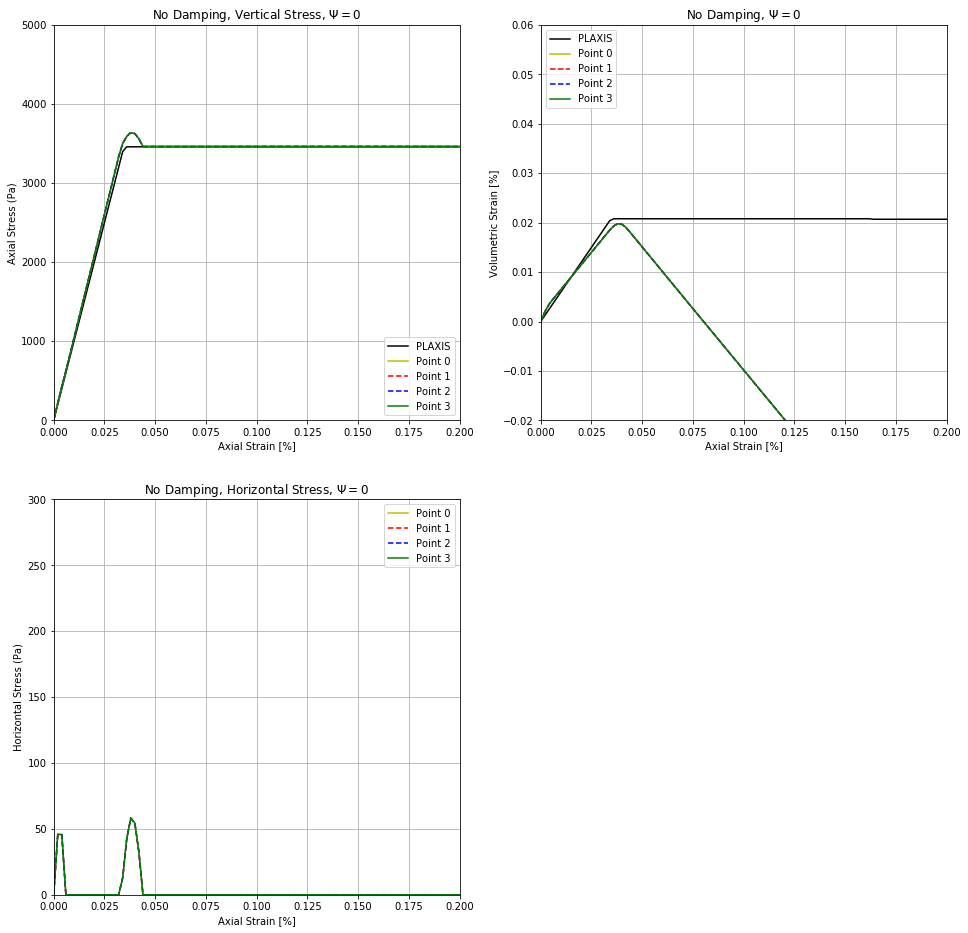

In [38]:
# Plot Comparison for Psi = 0, No Damping
plt.figure(figsize=(16,16))

plt.subplot(221)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,1] * 1000, 'k', label='PLAXIS')
plt.plot(strain_nodamping_psi0_0[:,2] * -100 , stress_nodamping_psi0_0[:,2] * -1, 'y', label='Point 0')
plt.plot(strain_nodamping_psi0_1[:,2] * -100 , stress_nodamping_psi0_1[:,2] * -1, 'r--', label='Point 1')
plt.plot(strain_nodamping_psi0_2[:,2] * -100 , stress_nodamping_psi0_2[:,2] * -1, 'b--', label='Point 2')
plt.plot(strain_nodamping_psi0_3[:,2] * -100 , stress_nodamping_psi0_3[:,2] * -1, 'g', label='Point 3')
plt.axis([0, 0.2, 0, 5000])
plt.legend(loc='lower right')
plt.title('No Damping, Vertical Stress, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(222)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,2] * -100, 'k', label='PLAXIS')
plt.plot(strain_nodamping_psi0_0[:,2] * -100 , (strain_nodamping_psi0_0[:,2] + strain_nodamping_psi0_0[:,1]) * -100, 'y', label='Point 0')
plt.plot(strain_nodamping_psi0_1[:,2] * -100 , (strain_nodamping_psi0_1[:,2] + strain_nodamping_psi0_1[:,1]) * -100, 'r--', label='Point 1')
plt.plot(strain_nodamping_psi0_2[:,2] * -100 , (strain_nodamping_psi0_2[:,2] + strain_nodamping_psi0_2[:,1]) * -100, 'b--', label='Point 2')
plt.plot(strain_nodamping_psi0_3[:,2] * -100 , (strain_nodamping_psi0_3[:,2] + strain_nodamping_psi0_3[:,1]) * -100, 'g', label='Point 3')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('No Damping, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    

plt.subplot(223)
plt.plot(strain_nodamping_psi0_0[:,2] * -100 , stress_nodamping_psi0_0[:,1] * -1, 'y', label='Point 0')
plt.plot(strain_nodamping_psi0_1[:,2] * -100 , stress_nodamping_psi0_1[:,1] * -1, 'r--', label='Point 1')
plt.plot(strain_nodamping_psi0_2[:,2] * -100 , stress_nodamping_psi0_2[:,1] * -1, 'b--', label='Point 2')
plt.plot(strain_nodamping_psi0_3[:,2] * -100 , stress_nodamping_psi0_3[:,1] * -1, 'g', label='Point 3')
plt.axis([0, 0.2, 0, 300])
plt.legend(loc='upper right')
plt.title('No Damping, Horizontal Stress, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Horizontal Stress (Pa)')
plt.grid(True)

plt.show()